In [55]:
!pip install scikit-image

You should consider upgrading via the '/home/amor/Documents/code_dw/neural-styles/venv/bin/python3 -m pip install --upgrade pip' command.


In [82]:

import torch

from neural_styles.svg_optim.svg_optimizer import CurveOptimizer, Generator, GroupGenerator
from neural_styles.svg_optim.excitation_forward_func import gen_vgg16_excitation_func, gen_vgg16_mimick, VGG16Layers
from neural_styles import ROOT_DIR


gen = Generator(10, 224, 224, allow_color=True)
n_iter = 10
torch.set_default_tensor_type('torch.FloatTensor')

forward_func = lambda img_batch, **kwargs: torch.linalg.norm(img_batch)
optimizer = CurveOptimizer(n_iter, 224, 224, gen.gen_func(), forward_func)
shapes, shape_groups = optimizer.gen_and_optimize()

Iter 5
Iter 7


In [83]:
shapes

In [84]:
from sklearn.cluster import KMeans
from skimage.color import rgb2hsv, hsv2rgb, rgb2lab, lab2rgb

X = [rgb2lab(sg.stroke_color.detach().numpy()[:3]) for sg in shape_groups]
W = [s.stroke_width.detach().numpy() for s in shapes]


kmeans = KMeans(n_clusters=3, random_state=0, max_iter=1000)
wt_kmeansclus = kmeans.fit(X, sample_weight=W)
predicted_kmeans = kmeans.predict(X, sample_weight=W)

In [85]:
predicted_kmeans

array([2, 0, 2, 0, 0, 0, 0, 1, 1, 0], dtype=int32)

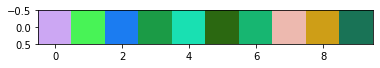

In [86]:
from matplotlib import pyplot as plt

def display_colors(X):
    rgb_X = [lab2rgb(x) for x in X]
    XX = np.concatenate(rgb_X, axis=-1).reshape(-1, 3)
    plt.imshow(XX.reshape(1, -1, 3))
    
display_colors(X)

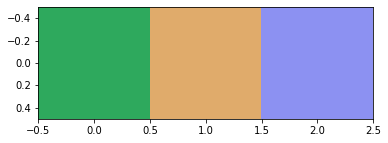

In [87]:
display_colors(kmeans.cluster_centers_)


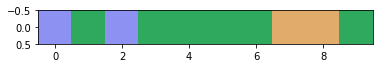

In [99]:
new_colors = [kmeans.cluster_centers_[i] for i in predicted_kmeans]

display_colors(new_colors)

In [95]:

def my_render(shapes, shape_groups):
    render = pydiffvg.RenderFunction.apply
    scene_args = pydiffvg.RenderFunction.serialize_scene( \
        1 * 224, 1 * 224, shapes, shape_groups)
    img = render(1 * 224, 1 * 224, 2, 2, 0,
                 torch.ones((1 * 224, 1 * 224, 4)), *scene_args)
    plt.imshow(img.cpu().detach().numpy())


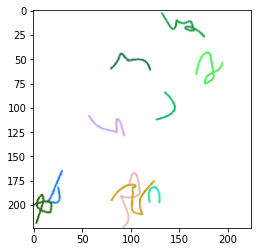

In [96]:
my_render(shapes, shape_groups)

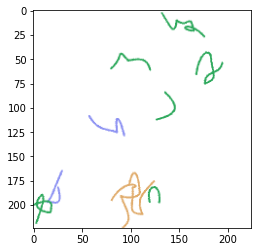

In [104]:
new_colors = [lab2rgb(kmeans.cluster_centers_[i]) for i in predicted_kmeans]

new_sgs = [pydiffvg.ShapeGroup(shape_ids=sg.shape_ids, fill_color=None,
                               stroke_color=torch.tensor((*new_colors[i], 1))) 
           for i, sg in enumerate(shape_groups)]

my_render(shapes, new_sgs)

[array([ 63.72915041,  21.9643116 , -49.22838211]),
 array([ 61.58667487, -50.47134807,  29.90627786]),
 array([ 63.72915041,  21.9643116 , -49.22838211]),
 array([ 61.58667487, -50.47134807,  29.90627786]),
 array([ 61.58667487, -50.47134807,  29.90627786]),
 array([ 61.58667487, -50.47134807,  29.90627786]),
 array([ 61.58667487, -50.47134807,  29.90627786]),
 array([73.80529428, 11.87689602, 40.14622271]),
 array([73.80529428, 11.87689602, 40.14622271]),
 array([ 61.58667487, -50.47134807,  29.90627786])]